In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)

from evaluation.run import get_map, get_charging_stations
charging_stations = get_charging_stations()

In [2]:
map_name = 'bielefeld'

In [3]:
G = get_map(map_name, charging_stations)
G.insert_charging_stations(charging_stations)

def info(G):
    fmt = '{:<20}:{:<20}'
    print(fmt.format('Charging Stations', len(G.charging_stations)))
    print(fmt.format('Edges', len(G.edges)))
    print(fmt.format('Nodes', len(G.nodes)))

In [4]:
info(G)

Charging Stations   :40                  
Edges               :117187              
Nodes               :53509               


In [5]:
def plot_graph(G, bbox, diff_G=None):
    x = [G.nodes[n]['lon'] for n in G.charging_stations]
    y = [G.nodes[n]['lat'] for n in G.charging_stations]
    if diff_G is None:
        lines = [[(G.nodes[u]['lon'], G.nodes[u]['lat']), (G.nodes[v]['lon'], G.nodes[v]['lat'])] 
                 for u, v in G.edges]
    else:
        lines = [[(G.nodes[u]['lon'], G.nodes[u]['lat']), (G.nodes[v]['lon'], G.nodes[v]['lat'])] 
                 for u, v in G.edges if (u, v) not in diff_G.edges]

    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(x, y, 'r.', markersize=12, label='Ladesäule')

    s, e, n, w = bbox
    ax.plot([e, e, w, w, e], [s, n, n, s, s], ls='-', color='dimgray')
    
    ax.set_ylim([s - .2, n + .2])
    
    lc = LineCollection(lines)
    lc.set_linewidth(0.8)
    lc.set_color('silver')
    ax.add_collection(lc)
    
    ax.set_aspect('equal')
    plt.legend()
    plt.xlabel('Längengrad')
    plt.ylabel('Breitengrad')
    
    plt.savefig('img/graph.png', dpi=300, bbox_inches='tight')

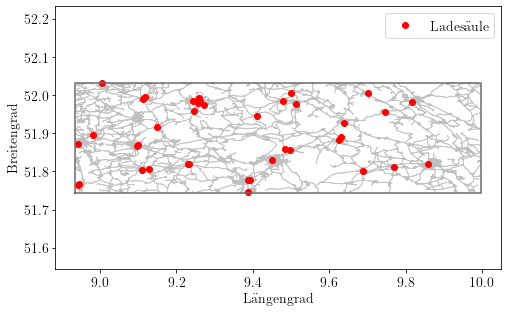

In [6]:
plot_graph(G, bbox=(51.7442,8.9346,52.0322,9.9977))